TASK-1

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

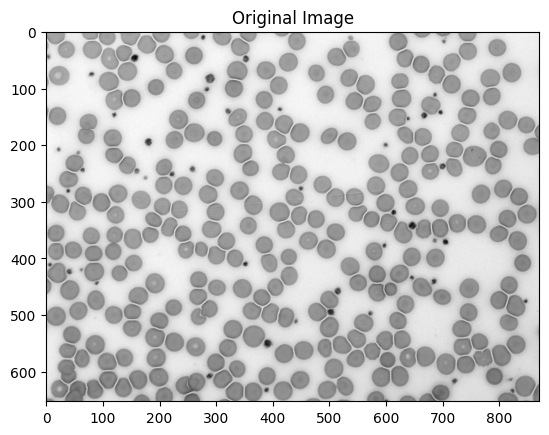

In [ ]:
image_path = '/content/Picture1.jpg'  # Replace with the actual path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

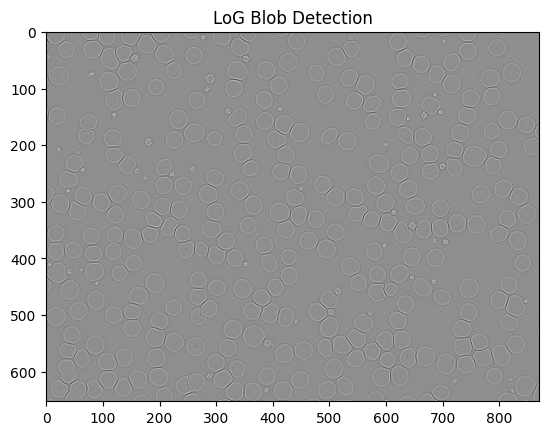

In [ ]:
log = cv2.Laplacian(image, cv2.CV_64F)
plt.imshow(log, cmap='gray')
plt.title("LoG Blob Detection")
plt.show()

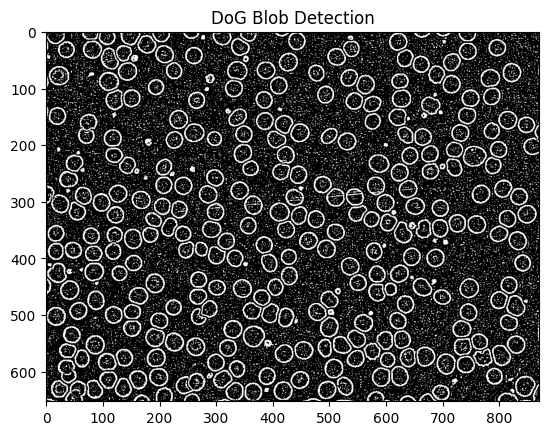

In [ ]:
blur1 = cv2.GaussianBlur(image, (5,5), 1)
blur2 = cv2.GaussianBlur(image, (5,5), 2)
dog = blur1 - blur2
plt.imshow(dog, cmap='gray')
plt.title("DoG Blob Detection")
plt.show()


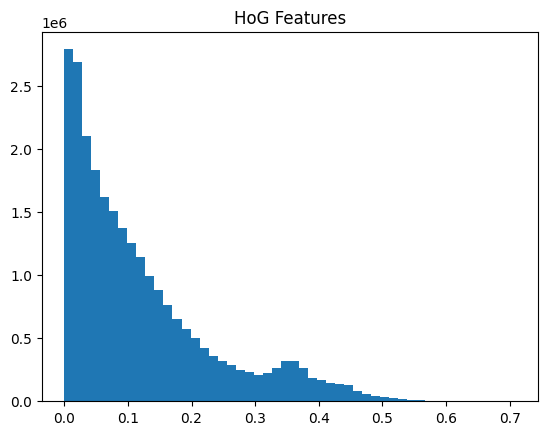

In [ ]:
hog = cv2.HOGDescriptor()
hog_feats = hog.compute(image)
plt.hist(hog_feats, bins=50)
plt.title("HoG Features")
plt.show()

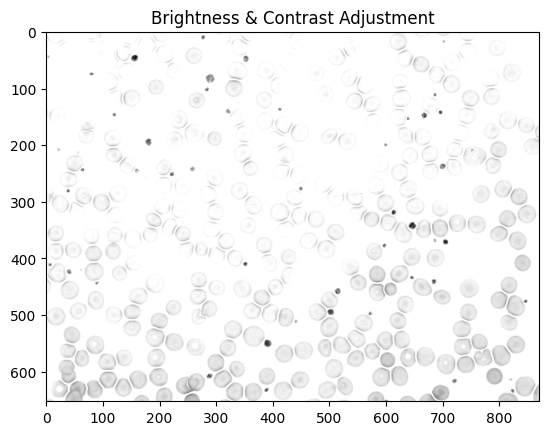

In [ ]:
alpha = 1.5  # Contrast control
beta = 20    # Brightness control
enhanced = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
plt.imshow(enhanced, cmap='gray')
plt.title("Brightness & Contrast Adjustment")
plt.show()

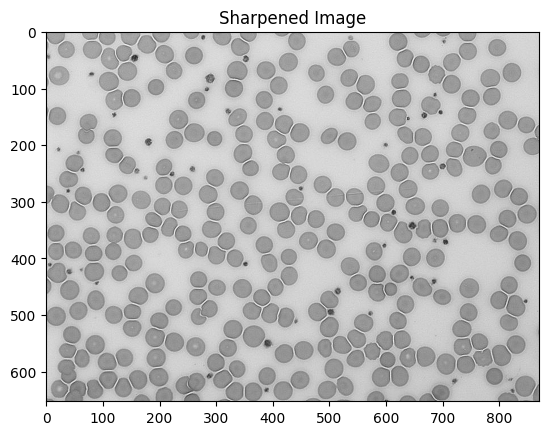

In [ ]:
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened = cv2.filter2D(image, -1, kernel)
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened Image")
plt.show()

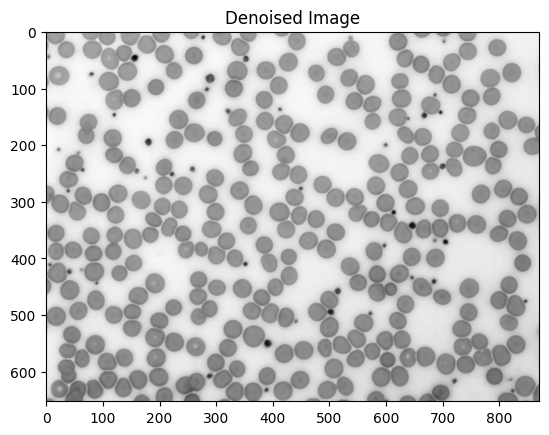

In [ ]:
denoised = cv2.medianBlur(image, 5)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised Image")
plt.show()

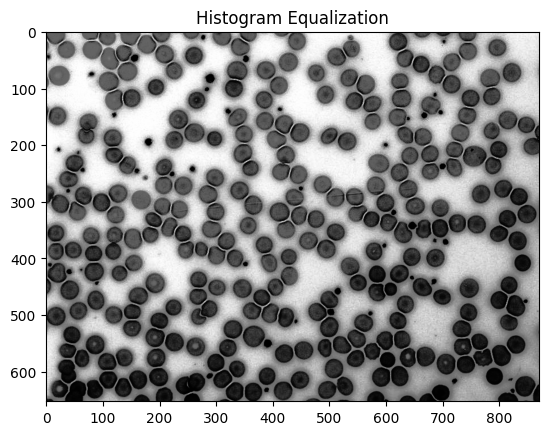

In [ ]:
equalized = cv2.equalizeHist(image)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalization")
plt.show()

TASK-2

In [ ]:
!pip install tensorflow keras deeplake

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 83.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalization

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50  # As AlexNet is unavailable in Keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

# VGG16 Model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
vgg16 = tf.keras.Sequential([
    vgg_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(100, activation='softmax')
])

vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

alexnet = tf.keras.Sequential([
    resnet_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(100, activation='softmax')
])

alexnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
vgg16.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
alexnet.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 62ms/step - accuracy: 0.0237 - loss: 4.4158 - val_accuracy: 0.0522 - val_loss: 4.0643
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.0568 - loss: 3.9978 - val_accuracy: 0.0887 - val_loss: 3.7780
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.1030 - loss: 3.6422 - val_accuracy: 0.1593 - val_loss: 3.3308
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.1749 - loss: 3.2244 - val_accuracy: 0.1926 - val_loss: 3.2259
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.2367 - loss: 2.9422 - val_accuracy: 0.2416 - val_loss: 2.9630
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 72ms/step - accuracy: 0.1433 - loss: 3.8191 - val_accuracy: 0.0262 - val_loss: 7.2283
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.2941 - loss: 2.7864 - val_accuracy: 0.2783 - val_loss: 3.1086
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.3480 - loss: 2.5294 - val_acc

In [ ]:
vgg16_eval = vgg16.evaluate(x_test, y_test, verbose=0)
alexnet_eval = alexnet.evaluate(x_test, y_test, verbose=0)

print(f"VGG16 - Loss: {vgg16_eval[0]}, Accuracy: {vgg16_eval[1]}")
print(f"AlexNet - Loss: {alexnet_eval[0]}, Accuracy: {alexnet_eval[1]}")

VGG16 - Loss: 2.9629528522491455, Accuracy: 0.24160000681877136
AlexNet - Loss: 3.6447300910949707, Accuracy: 0.22660000622272491


In [ ]:
import time

start_time = time.time()
_ = vgg16.predict(x_test[:10])
vgg16_time = time.time() - start_time

start_time = time.time()
_ = alexnet.predict(x_test[:10])
alexnet_time = time.time() - start_time

print(f"VGG16 Inference Time: {vgg16_time:.4f} seconds")
print(f"AlexNet Inference Time: {alexnet_time:.4f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
VGG16 Inference Time: 2.5923 seconds
AlexNet Inference Time: 4.5598 seconds
